### Analyzing Renewable Power and Weather Conditions

## Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

## Loading the Dataset

In [2]:
# Read csv
df = pd.read_csv('./renewable.csv')
df.drop(columns=['Time', 'sunlightTime', 'dayLength'], inplace=True)
df.head()

Energy delta[Wh]  GHI  temp  pressure  humidity  wind_speed  rain_1h  \
0                 0  0.0   1.6      1021       100         4.9      0.0   
1                 0  0.0   1.6      1021       100         4.9      0.0   
2                 0  0.0   1.6      1021       100         4.9      0.0   
3                 0  0.0   1.6      1021       100         4.9      0.0   
4                 0  0.0   1.7      1020       100         5.2      0.0   

   snow_1h  clouds_all  isSun  SunlightTime/daylength  weather_type  hour  \
0      0.0         100      0                     0.0             4     0   
1      0.0         100      0                     0.0             4     0   
2      0.0         100      0                     0.0             4     0   
3      0.0         100      0                     0.0             4     0   
4      0.0         100      0                     0.0             4     1   

   month  
0      1  
1      1  
2      1  
3      1  
4      1

<Figure size 1500x1000 with 0 Axes>

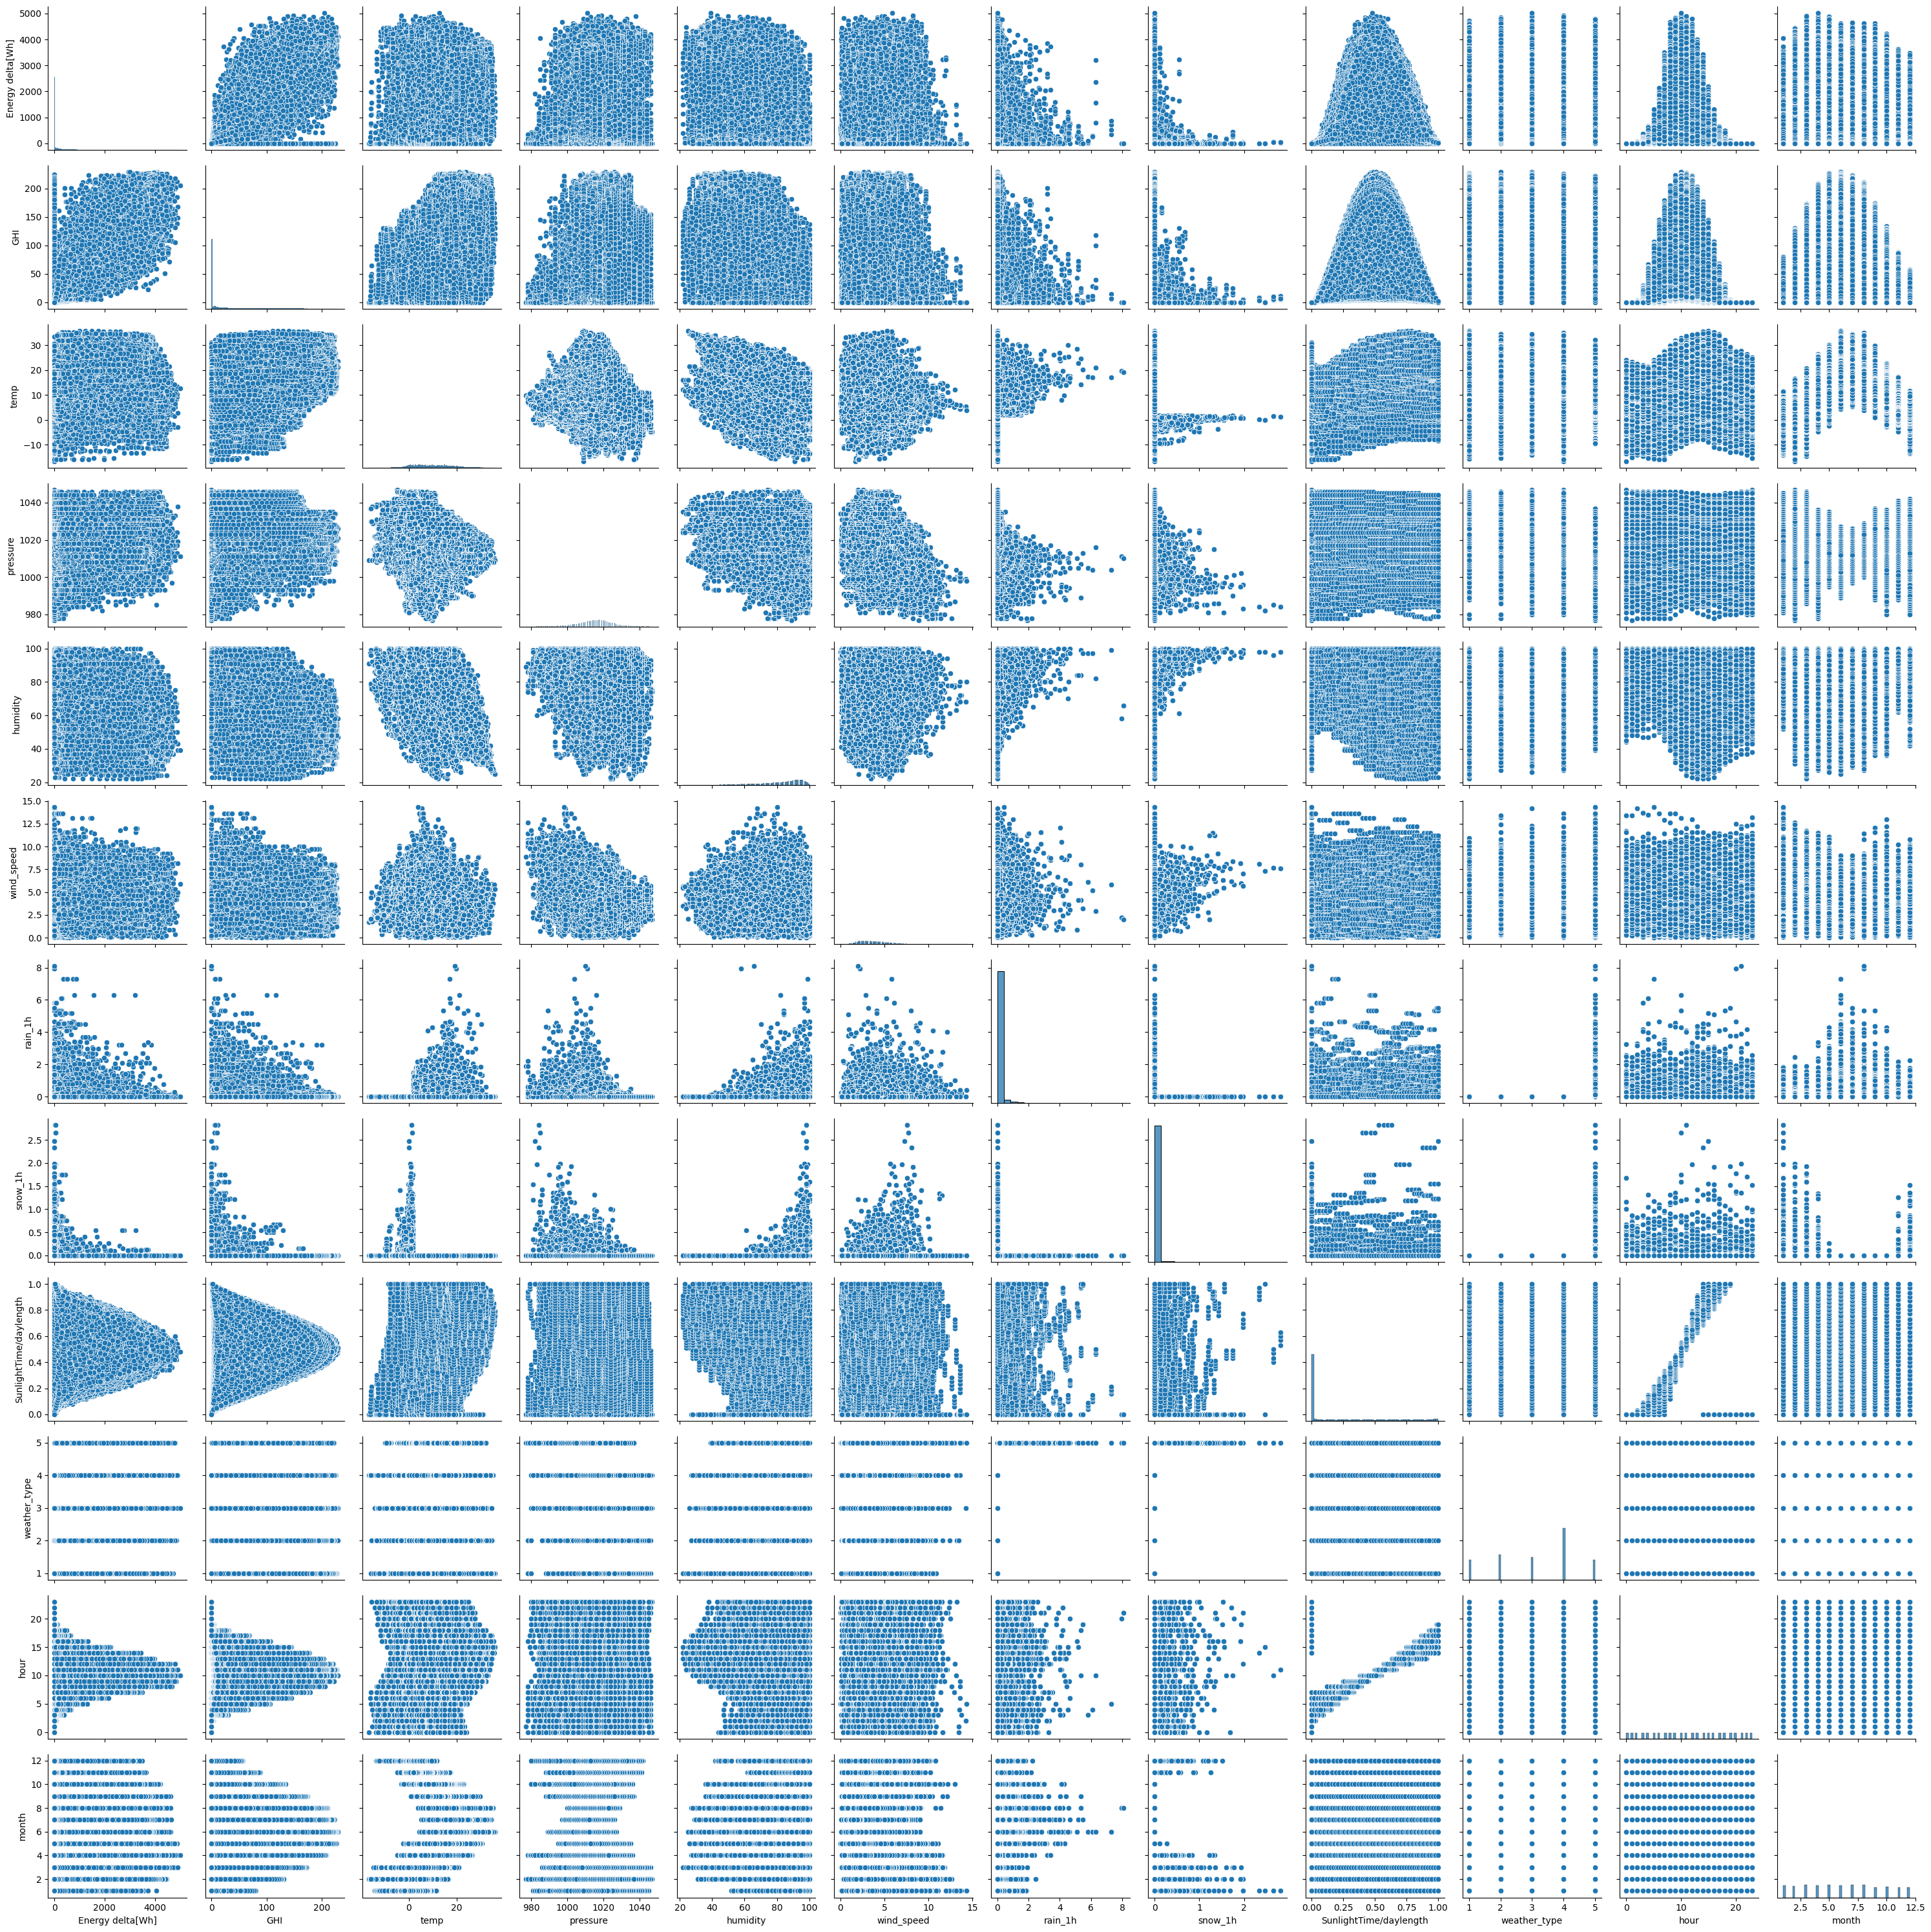

In [3]:
# Display relationships for each numerical feature
numerical_cols = ["Energy delta[Wh]","GHI","temp","pressure","humidity","wind_speed","rain_1h","snow_1h","SunlightTime/daylength","weather_type","hour","month"]

plt.figure(figsize=(15, 10))
sns.pairplot(df[numerical_cols], height=2.5)
plt.tight_layout()
plt.show()

## Correlation Analysis

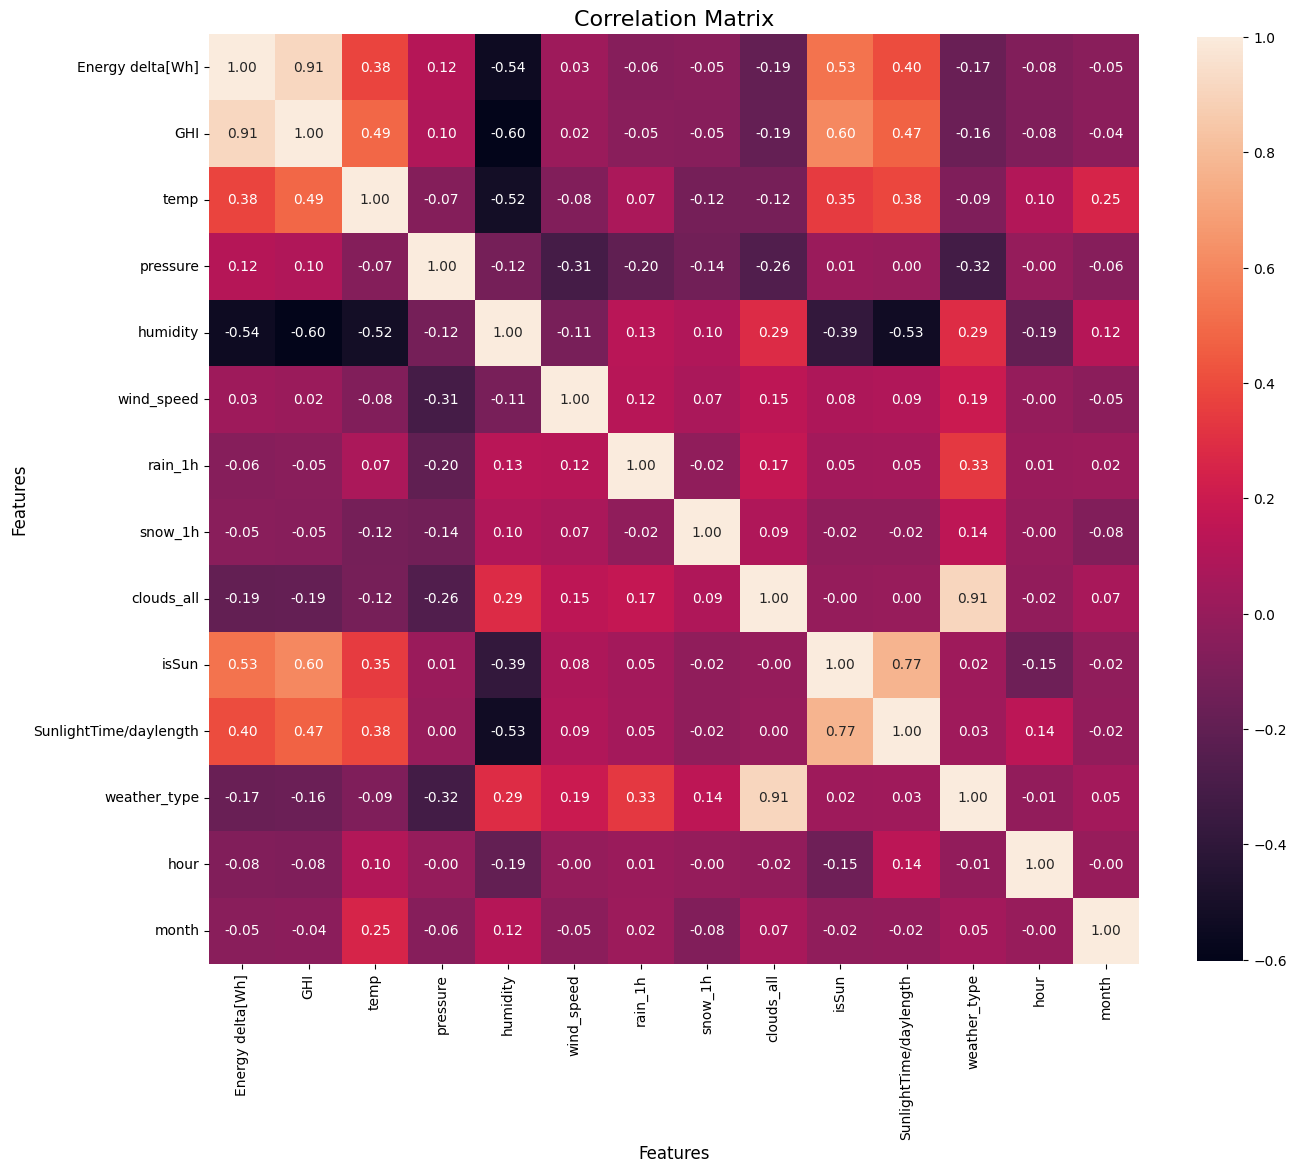

In [4]:
# Making a correlation matrix of all the features
correlation_matrix = df.corr()

plt.figure(figsize =(15,15))
hm = sns.heatmap(correlation_matrix,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 cbar_kws={'shrink': 0.8},
                 yticklabels=correlation_matrix.columns,
                 xticklabels=correlation_matrix.columns)
plt.title("Correlation Matrix", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()

## Linear Regression

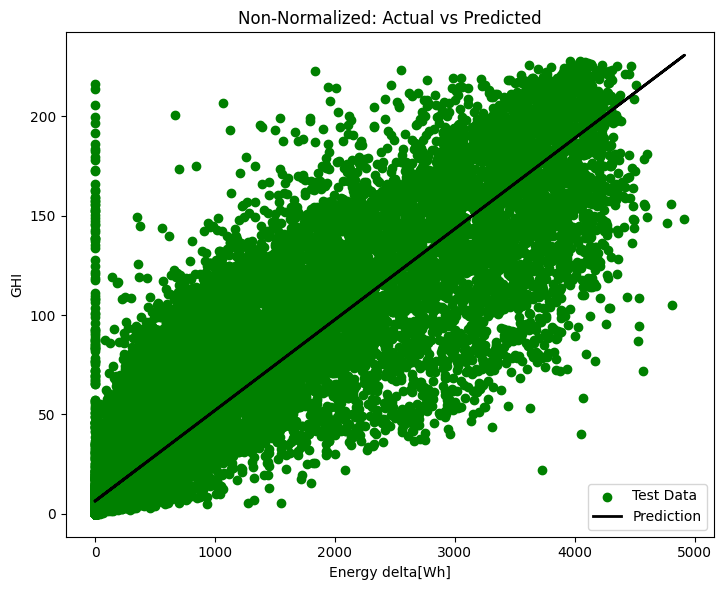

RMSE: 21.04 R2: 0.84
Training RMSE: 21.11
Training R²: 0.84


In [5]:
# Using most correlated pair set values to be trained
X = df[['Energy delta[Wh]']].values
Y = df[['GHI']].values

# Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Simple Linear Model on non-normalized data
non_norm_model = LinearRegression()
non_norm_model.fit(X_train, Y_train)

Y_test_non_norm_predict = non_norm_model.predict(X_test)
Y_train_non_norm_predict = non_norm_model.predict(X_train)

#getting RMSE and R2 for non normalized models
rmse_test_non_norm = np.sqrt(mean_squared_error(Y_test, Y_test_non_norm_predict))
r2_test_non_norm = r2_score(Y_test, Y_test_non_norm_predict)

rmse_train_non_norm = np.sqrt(mean_squared_error(Y_train, Y_train_non_norm_predict))
r2_train_non_norm = r2_score(Y_train, Y_train_non_norm_predict)

#Non-norm data
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test, Y_test, color='green', label='Test Data')
plt.plot(X_test, Y_test_non_norm_predict, color='black', lw=2, label='Prediction')
plt.xlabel('Energy delta[Wh]')
plt.ylabel('GHI')
plt.title('Non-Normalized: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

print(f"RMSE: {rmse_test_non_norm:.2f} R2: {r2_test_non_norm:.2f}")
print(f"Training RMSE: {rmse_train_non_norm:.2f}")
print(f"Training R²: {r2_train_non_norm:.2f}")

## XGBoost

[0]	validation_0-rmse:44.88232
[1]	validation_0-rmse:38.99798
[2]	validation_0-rmse:34.17148
[3]	validation_0-rmse:30.37754
[4]	validation_0-rmse:27.47279
[5]	validation_0-rmse:26.10056
[6]	validation_0-rmse:23.95557
[7]	validation_0-rmse:22.26921
[8]	validation_0-rmse:21.05747
[9]	validation_0-rmse:20.04378
[10]	validation_0-rmse:19.24571
[11]	validation_0-rmse:18.68441
[12]	validation_0-rmse:18.44536
[13]	validation_0-rmse:18.23618
[14]	validation_0-rmse:18.07815
[15]	validation_0-rmse:17.72335
[16]	validation_0-rmse:17.43703
[17]	validation_0-rmse:17.34932
[18]	validation_0-rmse:17.12090
[19]	validation_0-rmse:16.96783
[20]	validation_0-rmse:16.82178
[21]	validation_0-rmse:16.70685
[22]	validation_0-rmse:16.60073
[23]	validation_0-rmse:16.51871
[24]	validation_0-rmse:16.47700
[25]	validation_0-rmse:16.41519
[26]	validation_0-rmse:16.38106
[27]	validation_0-rmse:16.34702
[28]	validation_0-rmse:16.28161
[29]	validation_0-rmse:16.25176
[30]	validation_0-rmse:16.21714
[31]	validation_0-

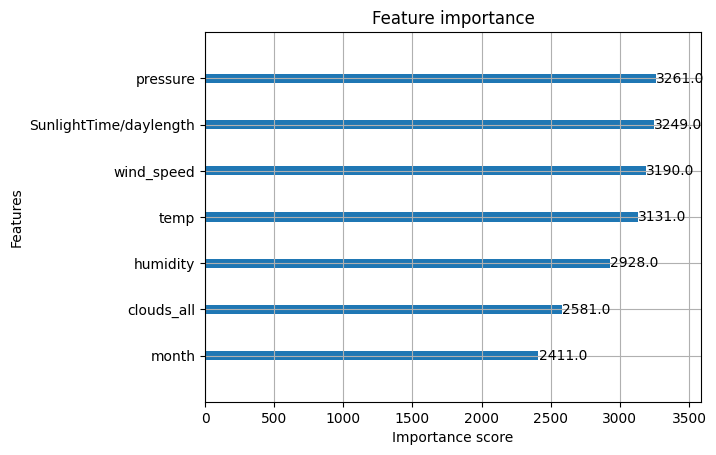

In [6]:
# Using most correlated pair set values to be trained
X = df[['temp', 'pressure', 'wind_speed', 'humidity', 'clouds_all', 'SunlightTime/daylength', 'month']]
Y = df[['GHI']].values

# Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=200,     # Number of trees
    learning_rate=0.2,    # Step size shrinkage
    max_depth=7,         # Maximum depth of a tree
    subsample=0.8,        # Row sampling
    colsample_bytree=0.8, # Feature sampling
    early_stopping_rounds = 10, # If model isn't improving stop
    reg_lambda = 1000, # Penalty
    random_state=42
)

# Train the model
model.fit(X_train, Y_train, eval_set=[(X_test, Y_test)])

# Make predictions
Y_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
r2_train = r2_score(Y_train, Y_train_pred)

print(f"Testing: RMSE: {rmse} r2: {r2}")
print(f"Training: RMSE: {rmse_train} r2: {r2_train}")

# Plot feature importance
xgb.plot_importance(model, importance_type="weight")
plt.show()

## Neural Network

Epoch 1/10


c:\Users\nic7m\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3936/3936 ━━━━━━━━━━━━━━━━━━━━ 5s 981us/step - loss: 558.8357 - mae: 11.0446 - val_loss: 180.5820 - val_mae: 6.8087
Epoch 2/10
3936/3936 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 203.7346 - mae: 7.3068 - val_loss: 161.5749 - val_mae: 6.3142
Epoch 3/10
3936/3936 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 193.8146 - mae: 7.0268 - val_loss: 158.9964 - val_mae: 6.2434
Epoch 4/10
3936/3936 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 180.0903 - mae: 6.7996 - val_loss: 152.4560 - val_mae: 6.1163
Epoch 5/10
3936/3936 ━━━━━━━━━━━━━━━━━━━━ 4s 920us/step - loss: 175.2455 - mae: 6.6480 - val_loss: 181.1225 - val_mae: 6.7374
Epoch 6/10
3936/3936 ━━━━━━━━━━━━━━━━━━━━ 4s 913us/step - loss: 172.9318 - mae: 6.5994 - val_loss: 166.7726 - val_mae: 6.4683
Epoch 7/10
3936/3936 ━━━━━━━━━━━━━━━━━━━━ 4s 939us/step - loss: 167.0170 - mae: 6.5063 - val_loss: 166.6535 - val_mae: 6.4856
Epoch 8/10
3936/3936 ━━━━━━━━━━━━━━━━━━━━ 4s 906us/step - loss: 166.6687 - mae: 6.4897 - val_loss: 180.8057 - val_mae: 6.8556
Epoch 9/

c:\Users\nic7m\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nic7m\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


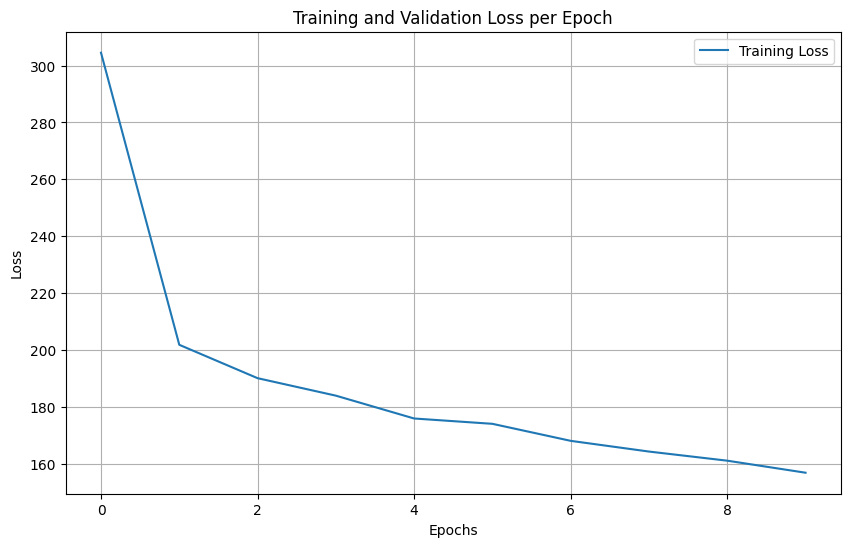

In [7]:
# Data preparation
X = df.drop(columns=["GHI"])
Y = df["GHI"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model definition
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

# Calculate R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

# Print results
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Training R²: {r2_train:.4f}")
print(f"Training RMSE: {rmse_train:.4f}")

# Plot training and validation loss per epoch
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid()
plt.show()